<a href="https://colab.research.google.com/github/karem19/Data-Analysis/blob/main/Models/LSTM_sch_model_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install gdown
import pandas as pd 
import numpy as np 
import gdown
import os 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
import zipfile
import matplotlib.pyplot as plt
from tqdm import tqdm

In [ ]:
url = 'https://drive.google.com/uc?export=download&id=1OOaRdG9L3hjT8OFZRRIBcOHFkk3soaLZ'
output= 'data.zip'
gdown.download(url, output, quiet=False)

Downloading...
From: https://drive.google.com/uc?export=download&id=1OOaRdG9L3hjT8OFZRRIBcOHFkk3soaLZ
To: /content/data.zip
851MB [00:20, 40.7MB/s]


'data.zip'

In [ ]:
with zipfile.ZipFile("data.zip","r") as zip_ref:
    zip_ref.extractall("")

In [ ]:
ts= pd.read_csv('/content/resampled_current/5bc90cb9f9af8b0d7fe77cff.csv',usecols=['signals'])

In [ ]:
ts.dropna(inplace=True)

In [ ]:
arr= np.trim_zeros(np.array(ts['signals']))

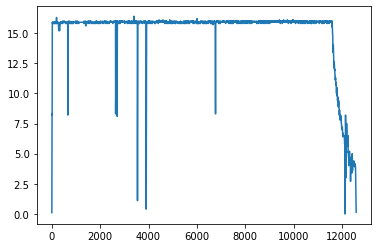

In [ ]:
plt.plot(arr)

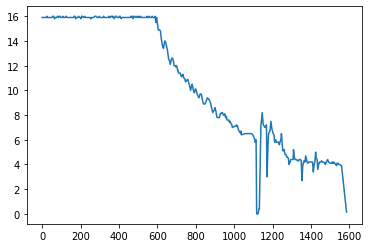

In [ ]:
plt.plot(arr[11000:])

In [ ]:
sampled_arr= np.array([arr[i*60] for i in range(int(arr.shape[0]/60))])

In [ ]:
def pre_process(ts): 
  ts.dropna(inplace=True)
  arr= np.trim_zeros(np.array(ts['signals']))
  sampled_arr= np.array([arr[i*60] for i in range(int(arr.shape[0]/60))])
  return sampled_arr


In [ ]:
from tqdm import tqdm 
timeseries= []
for file in tqdm(os.listdir('/content/resampled_current/')): 
  ts= pd.read_csv(f'/content/resampled_current/{file}',usecols=['signals'])
  arra= pre_process(ts)
  timeseries.append(arra)

data= np.concatenate(timeseries)

100%|██████████| 25229/25229 [03:02<00:00, 138.42it/s]


In [ ]:
from tqdm import tqdm 
timeseries= []
for file in tqdm(os.listdir('/content/resampled_current/')[20000:]): 
  ts= pd.read_csv(f'/content/resampled_current/{file}',usecols=['signals'])
  arra= pre_process(ts)
  timeseries.append(arra)

test_data= np.concatenate(timeseries)

100%|██████████| 5229/5229 [00:35<00:00, 145.93it/s]


In [ ]:
test_data.shape
train_data= data[:data.shape[0]-test_data.shape[0]]

In [ ]:
# preparing independent and dependent features
def prepare_data(timeseries_data, n_features):
	X, y =[],[]
	for i in range(len(timeseries_data)):
		# find the end of this pattern
		end_ix = i + n_features
		# check if we are beyond the sequence
		if end_ix > len(timeseries_data)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = timeseries_data[i:end_ix], timeseries_data[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return np.array(X), np.array(y)

In [ ]:
timeseries_data = train_data
# choose a number of time steps
n_steps = 10
# split into samples
X, y = prepare_data(timeseries_data, n_steps)

In [ ]:
X = X.reshape((X.shape[0], X.shape[1], 1))
# define model
model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps, 1)))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit modelrun
model.fit(X, y, epochs=300, verbose=1)

Epoch 1/300
125346/125346 [==============================] - 4033s 32ms/step - loss: 7.0458
Epoch 2/300
119954/125346 [===========================>..] - ETA: 2:49 - loss: 6.6547

KeyboardInterrupt: ignored

In [ ]:
test_ts_path = os.listdir('/content/resampled_current/')[12]
test_ts= pd.read_csv(f'/content/resampled_current/{test_ts_path}',usecols=['signals'])
test_arra= pre_process(test_ts)
#timeseries.append(arra)

In [ ]:
pred= []
i=0
while i<(test_arra.shape[0]-10):
  for j in range(5): 
    x_input= test_arra[i+j:10+i+j]
    x_input = x_input.reshape((1, 10, 1))
    pred.append(model.predict(x_input, verbose=0))
  i = i+5

0
5
10
15
20
25
30
35
40
45
50
55
60
65
70
75


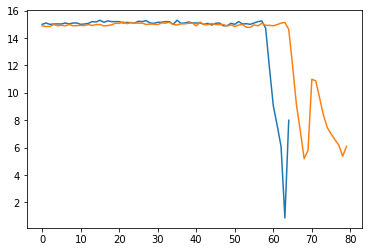

In [ ]:
import matplotlib.pyplot as plt
plt.plot(test_arra[15:80])
plt.plot(np.array(pred).reshape(80,))
plt.show()

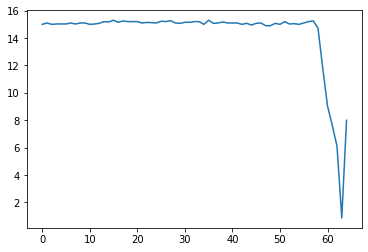

In [ ]:
plt.plot(test_arra[15:80])